In [12]:
import tensorflow as tf
import pandas as pd
import glob
import cv2
import numpy as np 
from PIL import ImageFont, ImageDraw, Image
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [28]:
normal_files = glob.glob(r"C:\Users\wanghuan\Desktop\airportScreen\images\*.jpg")
abnormal_files = glob.glob(r"C:\Users\wanghuan\Desktop\airportScreen\abnormal_images\*.jpg")


def read_image(path):
    return np.array(Image.open(path))


def read_dataset(test_size = 0.3, ratio = 0.1):
    normal_images = []
    for file in normal_files:
        im = read_image(file)
        im = cv2.resize(im, (0,0), im, ratio, ratio)
        normal_images.append(im)

    normal_images = np.array(normal_images)

    abnormal_images = []
    for file in abnormal_files:
        im = read_image(file)
        im = cv2.resize(im, (0,0), im, ratio, ratio)
        abnormal_images.append(im)

    abnormal_images = np.array(abnormal_images)

    images = np.r_[normal_images, abnormal_images]
    labels = np.r_[np.zeros(len(normal_images)), np.ones(len(abnormal_images))]

    idx = np.arange(len(images))
    np.random.shuffle(idx)

    images = images[idx]
    labels = labels[idx]


    N = len(images)
    T = int((1 - test_size) * N)

    X_train, X_test, y_train, y_test = images[:T], images[T:], labels[:T], labels[T:]

    return X_train, X_test, y_train, y_test

In [29]:
X_train, X_test, y_train, y_test = read_dataset()

In [30]:
input_shape_ = X_train.shape[1:]

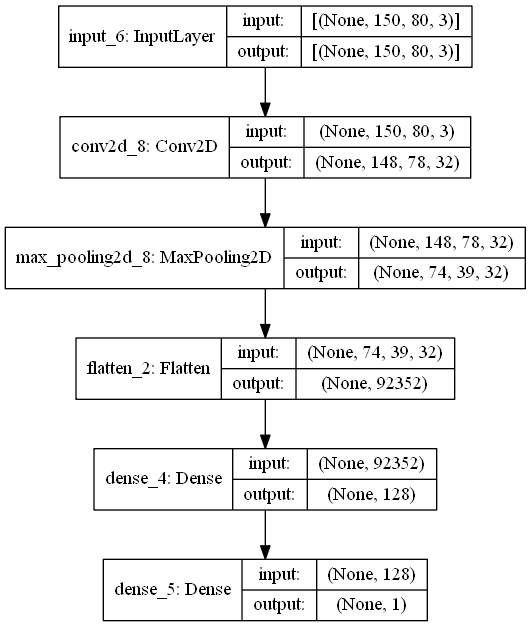

In [31]:
inputs = Input(shape = input_shape_)
x = Conv2D(64,3,activation = 'relu', strides = 10)(inputs)
x = MaxPooling2D()(x)
x = Conv2D(32,3,activation = 'relu')(inputs)
x = MaxPooling2D()(x)
x = Conv2D(32,3,activation = 'relu')(inputs)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)

model = Model(inputs, outputs)
plot_model(model, show_shapes = True)

In [32]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
model.fit(X_train/255., y_train, validation_data = (X_test/255., y_test), batch_size = 128, epochs = 20)

Epoch 1/20
3/3 [==============================] - 0s 71ms/step - loss: 0.0667 - accuracy: 0.9815 - val_loss: 0.1271 - val_accuracy: 0.9784
Epoch 2/20
3/3 [==============================] - 0s 50ms/step - loss: 0.0684 - accuracy: 0.9846 - val_loss: 0.0647 - val_accuracy: 0.9712
Epoch 3/20
3/3 [==============================] - 0s 48ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9640
Epoch 4/20
3/3 [==============================] - 0s 48ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0984 - val_accuracy: 0.9568
Epoch 5/20
3/3 [==============================] - 0s 46ms/step - loss: 0.0398 - accuracy: 0.9846 - val_loss: 0.0587 - val_accuracy: 0.9856
Epoch 6/20
3/3 [==============================] - 0s 47ms/step - loss: 0.0264 - accuracy: 0.9938 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 48ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 8/20
3/3 [===========

In [36]:
model.evaluate(X_test/255., y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 1.0000


[0.024558618664741516, 1.0]